In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
data=pd.read_csv('bottle.csv')

In [3]:
data.dropna(inplace=True)
data.drop('Cst_Cnt',axis=1,inplace=True)
data.drop('Btl_Cnt',axis=1,inplace=True)
data.drop('Depthm',axis=1,inplace=True)
data

,T_degC,Salnty
0,10.500,33.4400
1,10.460,33.4400
2,10.460,33.4370
3,10.450,33.4200
4,10.450,33.4210
...,...,...
864858,18.744,33.4083
864859,18.744,33.4083
864860,18.692,33.4150
864861,18.161,33.4062


In [4]:
data=data[:][:500]
data

,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421
...,...,...
502,12.00,33.310
503,11.88,33.260
504,11.74,33.265
505,11.66,33.280


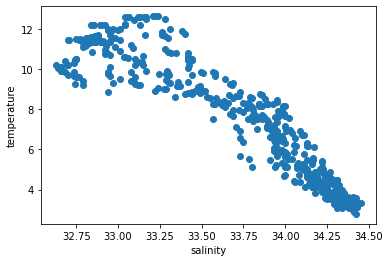

In [5]:
x=data['Salnty']
y=data['T_degC']
plt.plot(x, y,'o')
plt.xlabel("salinity")
plt.ylabel("temperature")
plt.show()

In [7]:
data.corr()

,T_degC,Salnty
T_degC,1.000000,-0.921586
Salnty,-0.921586,1.000000


In [11]:
table={"training size":[],"accuracy":[]}
df=pd.DataFrame(table)

In [114]:
X = data['Salnty'].values.reshape(-1,1)
y = data['T_degC'].values.reshape(-1,1)

for x in np.arange(0.55, 0.95, 0.05):
    X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=x, test_size=1-x, random_state=0)
    regression_model= LinearRegression()
    regression_model.fit(X_train, y_train)
    n=regression_model.score(X_test,y_test)
    df=df.append({"training size": x, "accuracy": n},ignore_index=True)



In [115]:
df

,training size,accuracy
0,0.55,0.857214
1,0.60,0.855915
2,0.65,0.854508
3,0.70,0.866997
4,0.75,0.869963
5,0.80,0.870356
6,0.85,0.859211
7,0.90,0.856197


In [116]:
df.nlargest(1, ['accuracy']) 

,training size,accuracy
5,0.8,0.870356
